In [1]:
#%matplotlib widget
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from collections import Counter
from astropy.io import fits

In [2]:
def Fits_Array(a):
    """Función para generar un array tridimensional de imágenes, siendo 'a'
    una lista con los pathnames de las imágenes que se quiere estackear"""
    b=np.empty([4096,4096,0])
    for i in range(len(a)):
        x=fits.open(a[i])
        b=np.dstack((b,np.array(x[0].data)))
    return b

In [3]:
#File names
fl50=glob.glob('Dark_50.000*')
fl100=glob.glob('Dark_100.000*')
fl200=glob.glob('Dark_200.000*')
fl300=glob.glob('Dark_300.000*')

In [4]:
#Cubos
data50=Fits_Array(fl50)
data100=Fits_Array(fl100)
data200=Fits_Array(fl200)
data300=Fits_Array(fl300)

In [5]:
#Medianas
median50=np.nanmedian(data50,axis=2)
median100=np.nanmedian(data100,axis=2)
median200=np.nanmedian(data200,axis=2)
median300=np.nanmedian(data300,axis=2)

In [6]:
#Desviación estándar
std100=np.std(median100)
std200=np.std(median200)
std300=np.std(median300)

In [7]:
#Promedios
m100=np.mean(median100)
m200=np.mean(median200)
m300=np.mean(median300)

In [8]:
#Desviación estándar por pixel
desves100=np.nanstd(data100,axis=2)
desves200=np.nanstd(data200,axis=2)
desves300=np.nanstd(data300,axis=2)

In [9]:
#Graficar todos los tiempos de exposicion y compararlos, sacar pixeles que no se comporten
#de manera lineal al comparar los tiempos de exposicion, y sacar los que se desvien demasiado
#en cada tiempo de exposicion y comparar.

In [10]:
cortes=np.linspace(0,50,21)

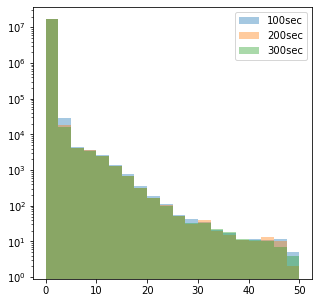

In [11]:
fig=plt.figure(figsize=(5,5))
plt.hist((median100/100).ravel(),density=False,log=True,bins=cortes,alpha=0.4,label='100sec')
plt.hist((median200/200).ravel(),density=False,log=True,bins=cortes,alpha=0.4,label='200sec')
plt.hist((median300/300).ravel(),density=False,log=True,bins=cortes,alpha=0.4,label='300sec')
#plt.axvline(m1,color='k',linestyle='dashed', linewidth=1)
#plt.savefig('Hist.png',facecolor='white')
plt.legend()
plt.show()

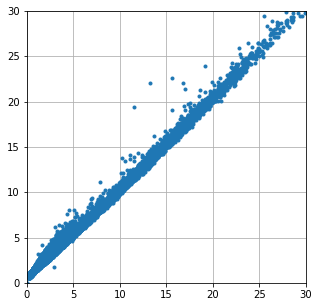

In [28]:
fig=plt.figure(figsize=(5,5))
plt.plot((median300/300).ravel(),(median100/100).ravel(),'.')
plt.grid()
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

In [13]:
hotpix50=median50[median50/50>26]
hotpix50.shape

(248,)

In [14]:
hotpix=median100[median100/100>26]
hotpix.shape

(230,)

In [15]:
hotpix2=median200[median200/200>26]
hotpix2.shape

(213,)

In [16]:
hotpix3=median300[median300/300>26]
hotpix3.shape

(211,)

In [17]:
#https://www.astropy.org/ccd-reduction-and-photometry-guide/v/dev/notebooks/08-01-Identifying-hot-pixels.html

In [18]:
copy=median200

In [19]:
copy[copy/200<26]=0
copy[copy/200>26]=1

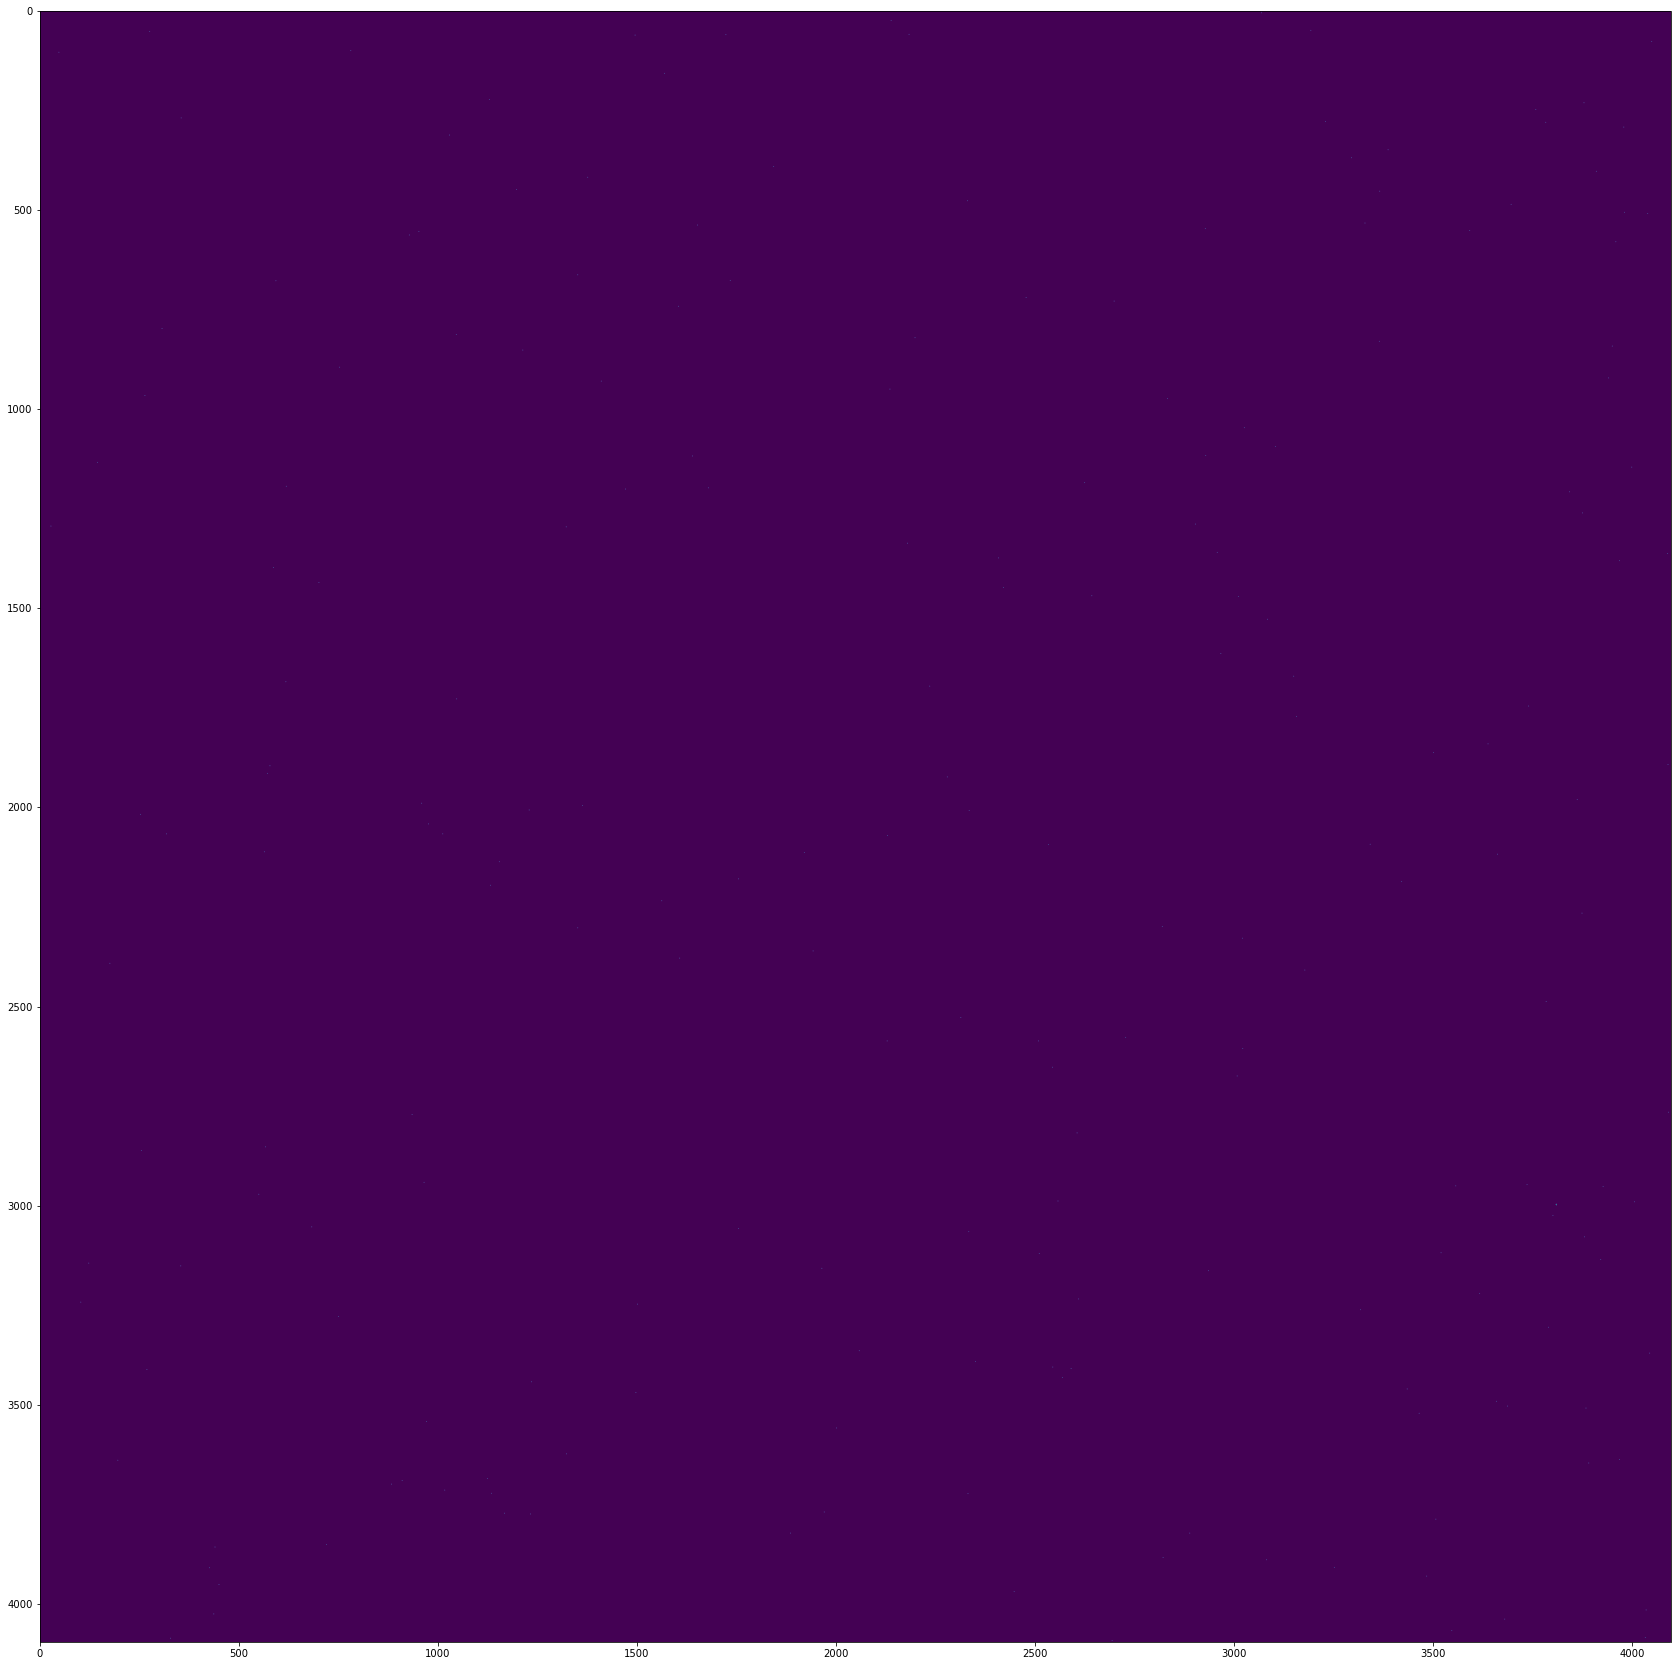

In [20]:
plt.figure(figsize=(30,30))
plt.imshow(copy)

In [23]:
#Creacion de fits
hdu=fits.ImageHDU()
hdu.data=copy
hdu.writeto('BPM.fit')